# Программирование на Python

*Алла Тамбовцева, НИУ ВШЭ*

## Практикум 6. Парсинг с библиотекой BeautifulSoup: часть 2

В предыдущей серии (код с прошлого семинара):

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
# grab HTML-code
page = requests.get("https://nplus1.ru/")
soup = BeautifulSoup(page.text)

In [3]:
# find links
raw_links = soup.find_all("a")

# filter links for news only
news = []
for link in raw_links:
    if "/news/" in link["href"]:
        news.append(link["href"])

In [4]:
# add nplus1.ru to create absolute links
links_full = []
for link in news:
    res = "https://nplus1.ru" + link
    links_full.append(res)

In [5]:
# choose one page to extract info

my_link = links_full[0]
my_page = requests.get(my_link)
my_soup = BeautifulSoup(my_page.text)

In [6]:
# extract author, date, title and description

author = my_soup.find("meta", 
                 {"name" : "mediator_author"})["content"]
date = my_soup.find("meta", 
                 {"itemprop" : "datePublished"})["content"]
title = my_soup.find("title").text
desc = my_soup.find("meta", 
                        {"name" : "description"})["content"]

In [7]:
# extract rubrics, time and diffc

div = my_soup.find("div", {"class" : "tables"})
tabs = div.find_all("p")

rubs_raw = tabs[0].find_all("a")
rubs = [r.text for r in rubs_raw]
rubs_str = ", ".join(rubs)

time = tabs[1].find("span").text
diffc = tabs[2].find("span", {"class" : "difficult-value"}).text

In [8]:
# all in all

print(author, date, title, desc, sep = "\n")
print(rubs_str, time, diffc, sep = "\n")

Михаил Подрезов
2022-06-04
Американке имплантировали напечатанную на 3D-биопринтере ушную раковину
Ее изготовили из хрящевой ткани уха самой пациентки
Медицина, 3D-печать
13:15
2.7


С прошлого раза у нас осталась одна задача – выгрузить текст новости и очистить его от лишней информации. Попробуем выполнить поиск по тэгам! Текст у нас обычно записывается абзацами, а абзацы заключаются в тэг `<p></p>`:

In [9]:
my_soup.find_all("p") 

[<p class="table">
 <a data-rubric="medicine" href="/rubric/medicine">Медицина</a>
 <a data-rubric="3dprinting" href="/rubric/3dprinting">3D-печать</a>
 </p>, <p class="table">
 <a href="/news/2022/06/04">
 <time content="2022-06-04" data-unix="1654337719" itemprop="datePublished">
 <span>13:15</span>
 <span>04 Июнь 2022</span>
 </time>
 </a>
 </p>, <p class="table">
 <a href="/difficult/2.7">
 <span>Сложность</span>
 <span class="difficult-value">2.7</span>
 </a>
 </p>, <p class="title"></p>, <p class="credits">3DBio Therapeutics</p>, <p>Американские врачи имплантировали 20-летней девушке с микротией ушную раковину, напечатанную на 3D-биопринтере из клеток хрящевой ткани уха самой пациентки. Хирургическая операция была выполнена в рамках клинических испытаний импланта AuriNovo. Об этом <a href="https://ir.3dbiocorp.com/2022/06/02/3dbio-therapeutics-and-the-microtia-congenital-ear-deformity-institute-conduct-human-ear-reconstruction-using-3d-bioprinted-living-tissue-implant-in-a-first-

К сожалению, не только текст новости заключается в тэг `<p></p>`, в таких тэгах можно встретить другую информацию: дату, время, сообщение об авторских правах и даже код на JavaScript. Чтобы отфильтровать только нужную информацию, попробуем уточнить поиск. Но как? Заметим, что у тэгов `<p>`, в которые заключены абзацы с текстом новости, нет дополнительных атрибутов, в частности нет атрибута `class`. А у тэгов `<p>`, которые содержат что-то отличное от текста новости, такой атрибут есть. Значит, можно поступить по-хитрому – запросить только те тэги `<p>`, где `class` пустой!

In [10]:
# None – пустота, специальный «пустой» тип 
# похож на NA или NaN в анализе данных

my_soup.find_all("p", {"class" : None})  

[<p>Американские врачи имплантировали 20-летней девушке с микротией ушную раковину, напечатанную на 3D-биопринтере из клеток хрящевой ткани уха самой пациентки. Хирургическая операция была выполнена в рамках клинических испытаний импланта AuriNovo. Об этом <a href="https://ir.3dbiocorp.com/2022/06/02/3dbio-therapeutics-and-the-microtia-congenital-ear-deformity-institute-conduct-human-ear-reconstruction-using-3d-bioprinted-living-tissue-implant-in-a-first-in-human-clinical-trial/" rel="nofollow" target="_blank">сообщается</a> в пресс-релизе компании 3DBio Therapeutics.</p>,
 <p>Микротия <a href="https://www.elibrary.ru/item.asp?id=12964852" rel="nofollow" target="_blank">представляет</a> собой врожденную аномалию развития, которая характеризуется частичным или полным отсутствием ушной раковины или одной из ее частей. Как правило, она сочетается с отсутствием (атрезией) наружного слухового прохода, а примерно в трети случаев — с недоразвитостью лицевой части скелета, например, нижней чел

Сохраним результат в переменную:

In [11]:
pars_raw = my_soup.find_all("p", {"class" : None})

Извлечём текст из тэгов и сохраним абзацы в отдельный список:

In [12]:
pars_str = [p.text for p in pars_raw]
print(pars_str[0])

Американские врачи имплантировали 20-летней девушке с микротией ушную раковину, напечатанную на 3D-биопринтере из клеток хрящевой ткани уха самой пациентки. Хирургическая операция была выполнена в рамках клинических испытаний импланта AuriNovo. Об этом сообщается в пресс-релизе компании 3DBio Therapeutics.


### Задача 1

Используя список `pars_text`, «склейте» из абзацев целый текст и сохраните его в переменную `text`.

In [13]:
# используем метод .join()
# склеиваем по пробелу, поэтому " " перед .join()

text = " ".join(pars_str)
text

'Американские врачи имплантировали 20-летней девушке с\xa0микротией ушную раковину, напечатанную на\xa03D-биопринтере из\xa0клеток хрящевой ткани уха самой пациентки. Хирургическая операция была выполнена в\xa0рамках клинических испытаний импланта AuriNovo. Об\xa0этом сообщается в\xa0пресс-релизе компании 3DBio Therapeutics. Микротия представляет собой врожденную аномалию развития, которая характеризуется частичным или полным отсутствием ушной раковины или одной из\xa0ее\xa0частей. Как правило, она сочетается с\xa0отсутствием (атрезией) наружного слухового прохода, а\xa0примерно в\xa0трети случаев\xa0— с\xa0недоразвитостью лицевой части скелета, например, нижней челюсти. В\xa0разных популяциях частота этой аномалии неодинаковая. Ученые сообщают, что она варьируется от\xa00,83 до\xa017,4 случая на\xa010000\xa0новорожденных. Считается, что микротия чаще встречается у\xa0латиноамериканцев, азиатов, коренных американцев и\xa0жителей Анд. Проблема воссоздания ушной раковины занимает особое 

### Задача 2

Подумайте, каким образом из `text` можно убрать информацию, не относящуюся к тексту новости. Уберите её и сохраните изменения в переменной `text`.

In [14]:
# используем метод .split()
# он разбивает текст на часть до "Нашли опечатку?" и после
# и возвращает список из двух элементов
# потом берём из списка первый элемент (до) с индексом 0

text = text.split("Нашли опечатку?")[0] 

### Задача 3

Замените символ `\xa0` на пробел и сохраните изменения в переменной `text`.

In [15]:
# на первом месте – что заменяем, на втором – на что
# \xa0 – неразрывный пробел

text = text.replace("\xa0", " ") 

### Задача 4

Напишите функцию `get_info()`, которая принимает на вход ссылку на новость, а возвращает список со всеми характеристиками, которые мы извлекли выше для тестовой новости.

In [16]:
# помещаем весь код, который мы написали для одной ссылки
# внутрь функции и следим за тем, чтобы название аргумента 
# (my_link) совпадало с названием переменной, с которой мы дальше
# работаем в самой функции

def get_info(my_link):
    my_page = requests.get(my_link)
    my_soup = BeautifulSoup(my_page.text)
    author = my_soup.find("meta", 
                 {"name" : "mediator_author"})["content"]
    date = my_soup.find("meta", 
                     {"itemprop" : "datePublished"})["content"]
    title = my_soup.find("title").text
    desc = my_soup.find("meta", 
                            {"name" : "description"})["content"]
    div = my_soup.find("div", {"class" : "tables"})
    tabs = div.find_all("p")

    rubs_raw = tabs[0].find_all("a")
    rubs = [r.text for r in rubs_raw]
    rubs_str = ", ".join(rubs)

    time = tabs[1].find("span").text
    diffc = tabs[2].find("span", {"class" : "difficult-value"}).text
    
    pars_raw = my_soup.find_all("p", {"class" : None})
    pars_str = [p.text for p in pars_raw]
    text = " ".join(pars_str)
    text = text.split("Нашли опечатку?")[0]
    text = text.replace("\xa0", " ")
    text = text.replace("\n", " ")
    
    res = [title, desc, author, date, time, rubs_str, diffc, text]
    
    return res

In [17]:
# проверяем на примере

get_info(links_full[5]) 

['Физики численно откупорили шампанское',
 'Симуляция позволила понять, как ведет себя струя углекислого газа при вылете пробки',
 'Марат Хамадеев',
 '2022-06-03',
 '14:10',
 'Физика, Хлеб и вино',
 '4.8',
 'Индийские и французские физики провели симуляцию процессов, которые происходят при открывании бутылки шампанского. Расчеты подтвердили результаты экспериментов, в которых обнаружились сверхзвуковые режимы движения газовых струй. Результаты работы ученых смогут помочь лучше разобраться в том, что происходит при взлете ракет и стрельбе из огнестрельного оружия. Исследование опубликовано в Physics of Fluids. Игристое вино (которое часто называют шампанским) прекрасно подходит для того, чтобы подчеркнуть торжественность какого-либо события. Благодаря избытку углекислоты открытие бутылки сопровождают праздничный хлопок и фонтан пены (которых, впрочем, можно избежать), а фужер украшается причудливой игрой пузырьков. Все вышеуказанное было бы невозможным без сложных физико-химических взаи

### Задача 5

Примените функцию `get_info()` ко всем элементам списка `links_full` и создайте список списков `info` (один список внутри `info` – характеристики одной новости).

In [18]:
# импортируем функцию sleep из модуля time,
# чтобы при выгрузке делать задержки и чтобы
# сайт не понял, что мы его автоматически грабим

from time import sleep

In [19]:
# запускаем цикл for по всем ссылкам в списке links_full:
# применяем к каждой ссылке функцию get_info()
# и записываем результат в список info
# после каждого обновления списка info 
# ждём 1.5 секунды и пишем сообщение, что
# ссылка обработана

info = [] 
for link in links_full:
    res = get_info(link)
    info.append(res) 
    sleep(1.5) 
    print(link + "... done!") 

https://nplus1.ru/news/2022/06/04/ear-implant... done!
https://nplus1.ru/news/2022/06/04/chicken-in-italy... done!
https://nplus1.ru/news/2022/06/04/burrowing-bugs... done!
https://nplus1.ru/news/2022/06/03/optimism-pessimism... done!
https://nplus1.ru/news/2022/06/03/nanoplastic-water-filtration... done!
https://nplus1.ru/news/2022/06/03/champagne-cork-popping... done!
https://nplus1.ru/news/2022/06/03/monkeypox-mutated... done!
https://nplus1.ru/news/2022/06/03/australian-seagrass... done!
https://nplus1.ru/news/2022/06/03/neolithic-china... done!
https://nplus1.ru/news/2022/06/03/sber-in-spb... done!
https://nplus1.ru/news/2022/06/03/konjaku-water... done!
https://nplus1.ru/news/2022/06/03/jochi-khan-mausoleum... done!
https://nplus1.ru/news/2022/06/03/hunting-camp... done!
https://nplus1.ru/news/2022/06/02/discokeryx-xiezhi... done!
https://nplus1.ru/news/2022/06/02/maven-works... done!
https://nplus1.ru/news/2022/06/02/co2-fixation... done!
https://nplus1.ru/news/2022/06/02/nasa-s

In [20]:
# info –  список списков
# один список внутри info = инфо по одной новости

info

Теперь превратим полученный список списков в датафрейм - так удобнее будет работать, причём не только в Python:

In [21]:
import pandas as pd

In [22]:
df = pd.DataFrame(info)

Добавим столбцам датафрейма понятные названия (по умолчанию добавляются просто целочисленные индексы):

In [26]:
df.columns = ["title", "desc", "aythor", "date", "time", "rubrics",
             "difficulty", "text"]

Проверим, столбцы каких типов хранятся в датафрейме (аналог функции `str()` в R):

In [27]:
# object = string = текст
# float = числа с плавающей точкой (дробные)
# int = целые числа

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 8 columns):
title         28 non-null object
desc          28 non-null object
aythor        28 non-null object
date          28 non-null object
time          28 non-null object
rubrics       28 non-null object
difficulty    28 non-null object
text          28 non-null object
dtypes: object(8)
memory usage: 1.9+ KB


Столбец `diffc` содержит дробные числа, но мы пока сохраняли их в виде текста, поэтому тип этого столбца `object`, а не `float`, как должно быть. Исправим тип столбца с помощью метода `astype()`. 

In [29]:
# выбираем столбец, преобразуем,
# потом сохраняем с тем же названием

df["difficulty"] = df["difficulty"].astype(float) 

Экспортируем датафрейм в файл Excel:

In [30]:
df.to_excel("/Users/allat/Desktop/nplus1.xlsx")

Напоследок построим какой-нибудь график по имеющимся данным. Проще всего это будет сделать для столбца `diffc`, так как он числовой. Построим для него гистограмму и посмотрим на распределение оценок сложности новостей.

Напишем магическую строку, которая будет сообщать Jupyter Notebook, что графики должны отображаться прямо здесь, в файле `.ipynb`.

In [31]:
%matplotlib inline

Для построения гистограммы воспользуемся методом `.hist()`, в него можно вписать аргумент, отвечающий за цвет (названия цветов из R тоже подходят, плюс, цвета в формате [HEX](https://www.color-hex.com/) тоже)

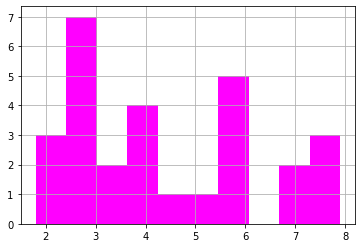

In [33]:
df["difficulty"].hist(color = "magenta") 